Fraud Detection and Prediction - Quantum
==========================================

***Quantum Models Used***
* VQC (Variation Quantum Classifier)
* 

Both Over-Sampling and Under-Sampling is used 

**Author:** *Bipul Sinha*

In [1]:
%pip install --upgrade imblearn qiskit-machine-learning qiskit-aer

Note: you may need to restart the kernel to use updated packages.


In [2]:
import warnings 
warnings.filterwarnings("ignore")

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os

import time

# 1. Data Exploration

In [3]:
df = pd.read_csv('./dataset/creditcard.csv')
df.describe().T # Data Summary

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,1.168375e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,3.416908e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-1.379537e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.074095e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,9.604066e-16,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,1.487313e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-5.556467e-16,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,1.213481e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-2.406331e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


In [4]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

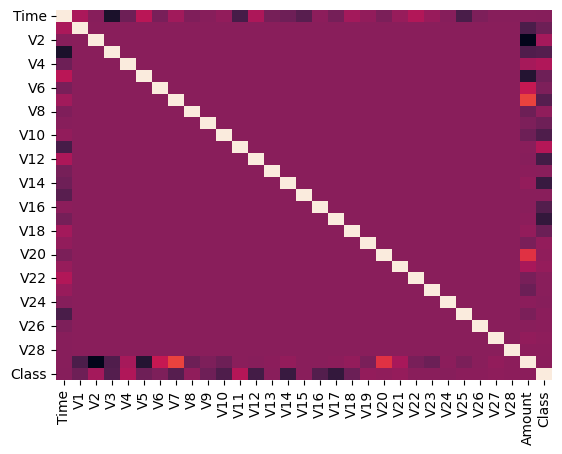

In [7]:
import seaborn as sns
sns.heatmap(df.corr(), annot=False, fmt=".2f", cbar=False)
plt.show()

## 1a. Understanding and evaluating data
* Since, we are unable to see data from other than Class 0, we need data evaluation.
* Plus, the number of instances of fraudelent data are less in numbers we need to pump-up the fraudelent data.

Target distribution "1" & "0" in column "Class", legal and fraudulent transactions, respectively, pieces
0: 284315
1: 492
Imbalance degree: 1: 577.88
 
Target distribution "1" & "0" in column "Class", legal and fraudulent transactions, respectively, %
Class
0    99.827251
1     0.172749
Name: Class, dtype: float64


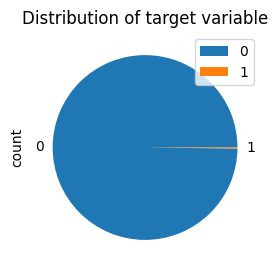

In [8]:
import pylab
pylab.rcParams['figure.figsize'] = (8, 5)

# Target distribution
print('Target distribution "1" & "0" in column "Class", legal and fraudulent transactions, respectively, pieces')
target_count = df['Class'].value_counts()
print('0:', target_count[0])
print('1:', target_count[1])
print('Imbalance degree:', '1:', round(target_count[0] / target_count[1], 2))
print (' ')
print('Target distribution "1" & "0" in column "Class", legal and fraudulent transactions, respectively, %')
print((df.groupby('Class')['Class'].count()/df['Class'].count())*100)


pylab.rcParams['figure.figsize'] = (4, 3)
target_count.plot(kind='pie', title='Distribution of target variable', legend="true");

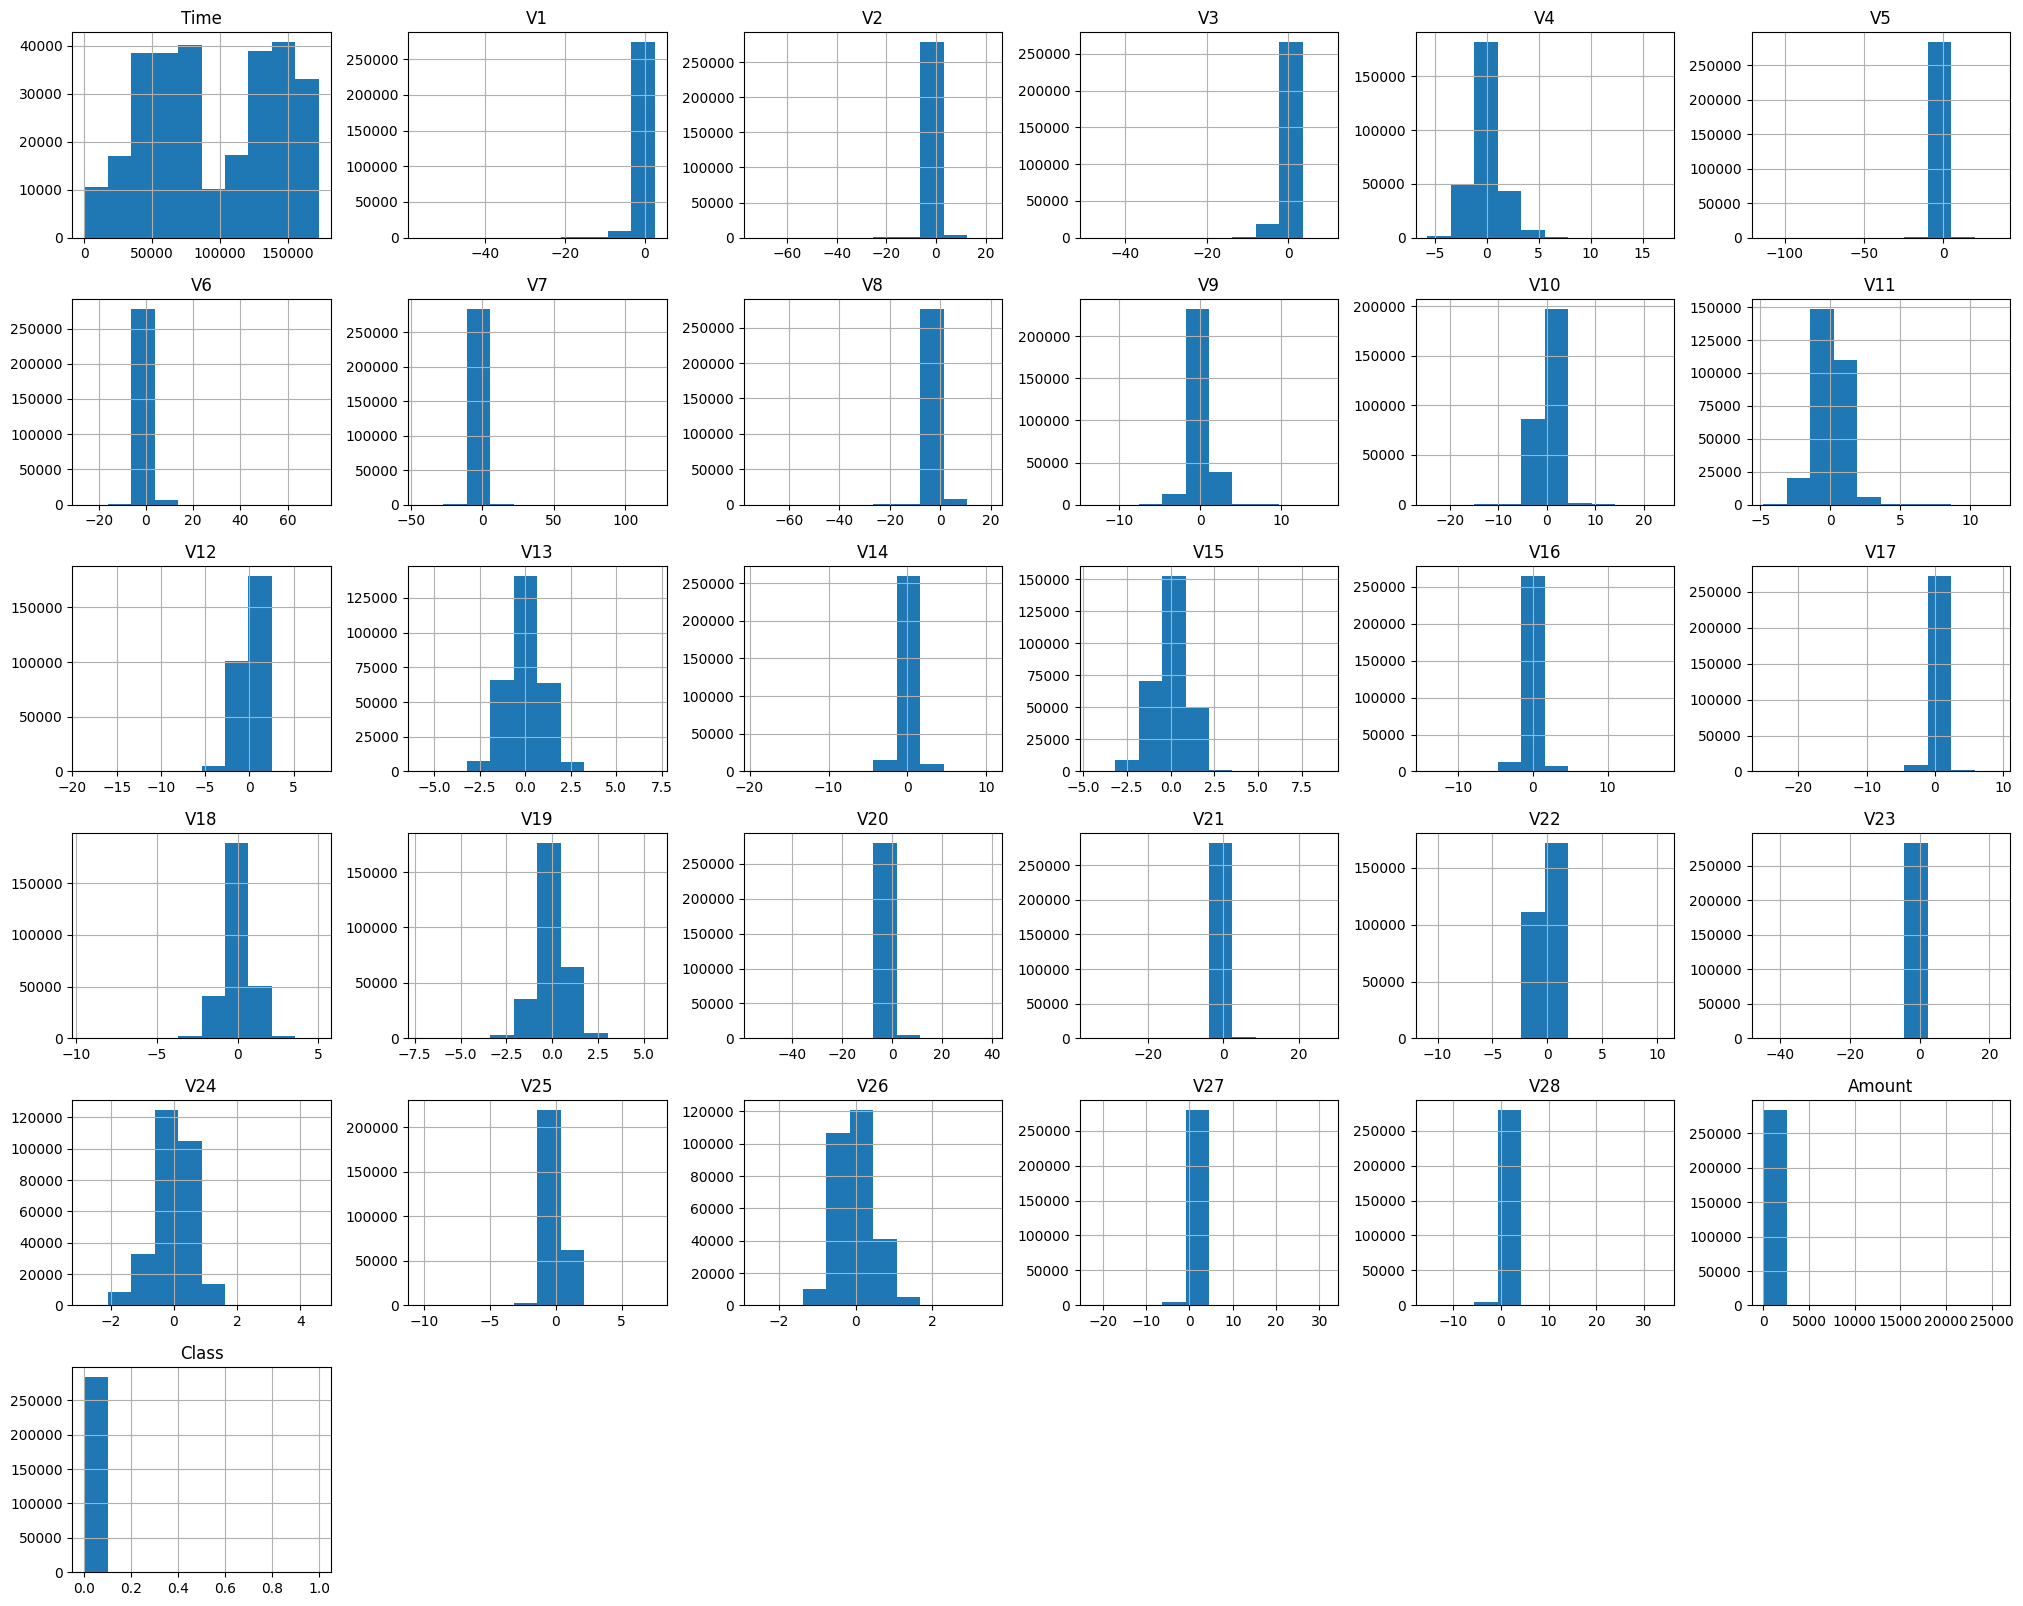

In [9]:
df.hist(figsize=(25,20))
plt.show()

# 2. Data Cleansing
* Since, the number of instances of 0 is 284315 and for Class 1 it is mere 492, we need to resolve data imbalance. This could be done by either Over-Sampling or Under-Sampling
* But prior to that, we need to figure out instances of duplicates and clean the data from such instances

## Removing Duplicates

In [10]:
df.duplicated().any
df.duplicated().sum()

1081

In [11]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

# 3. Solving Data Imbalance Problem

### Columnar Imbalance
- Normalization/Standardization - We can opt for either of them for Time and Amount column. 

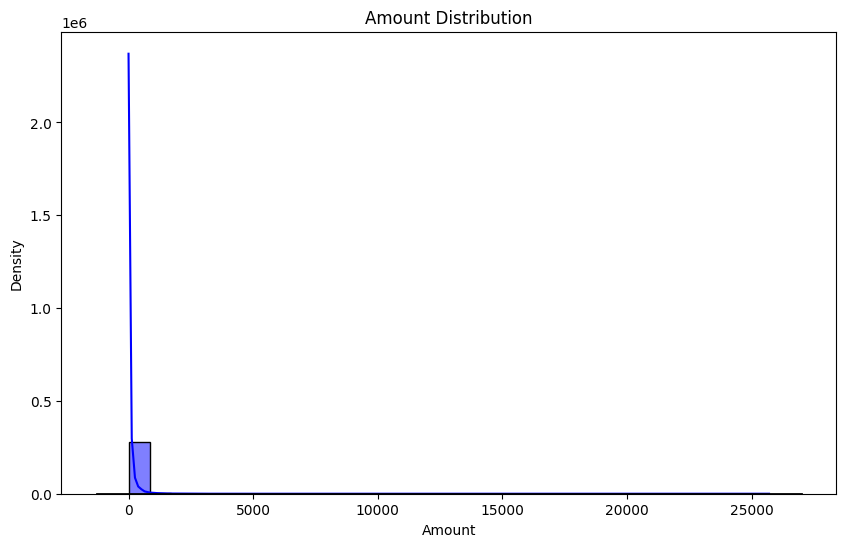

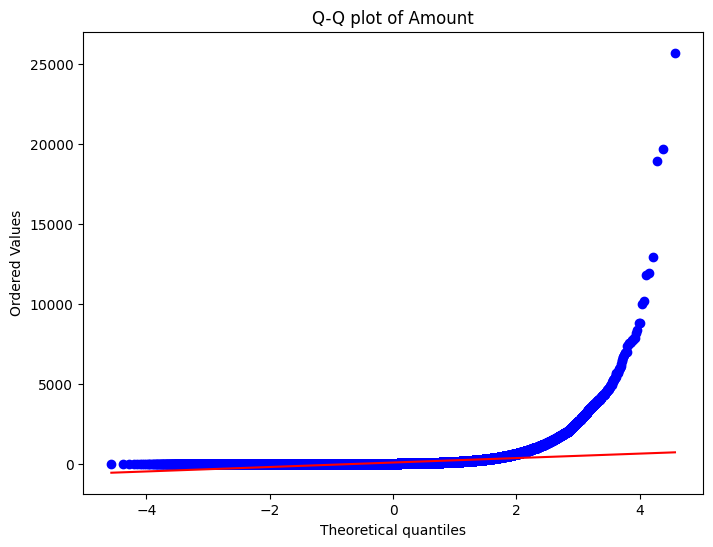

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

amount_data = df['Amount'].values

# Plot histogram to visualize the distribution
plt.figure(figsize=(10, 6))
sns.histplot(amount_data, bins=30, kde=True, color='blue')

# Fit a normal distribution to the data
mu, sigma = stats.norm.fit(amount_data)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mu, sigma)
plt.plot(x, p, 'k', linewidth=2)

# Add labels and title
plt.title("Amount Distribution")
plt.xlabel("Amount")
plt.ylabel("Density")

# Show plot
plt.show()

# Plot a Q-Q plot to compare against a theoretical normal distribution
plt.figure(figsize=(8, 6))
stats.probplot(amount_data, dist="norm", plot=plt)
plt.title("Q-Q plot of Amount")
plt.show()


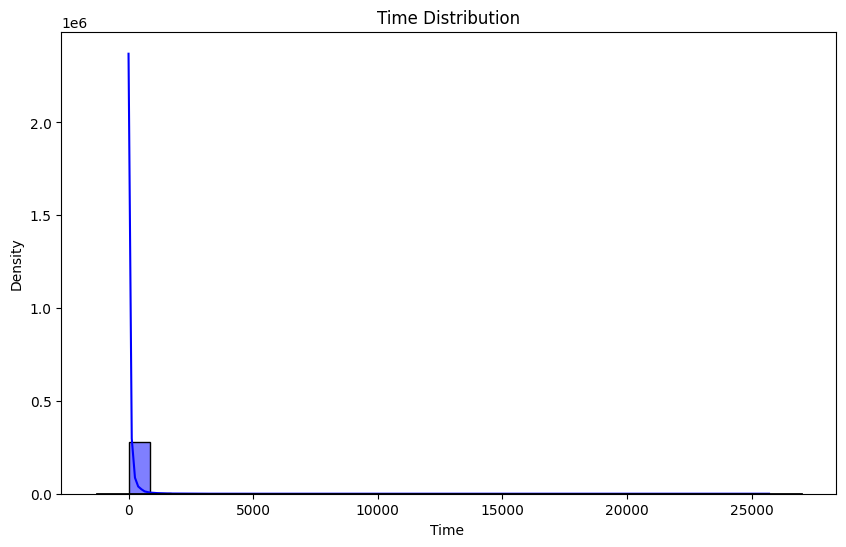

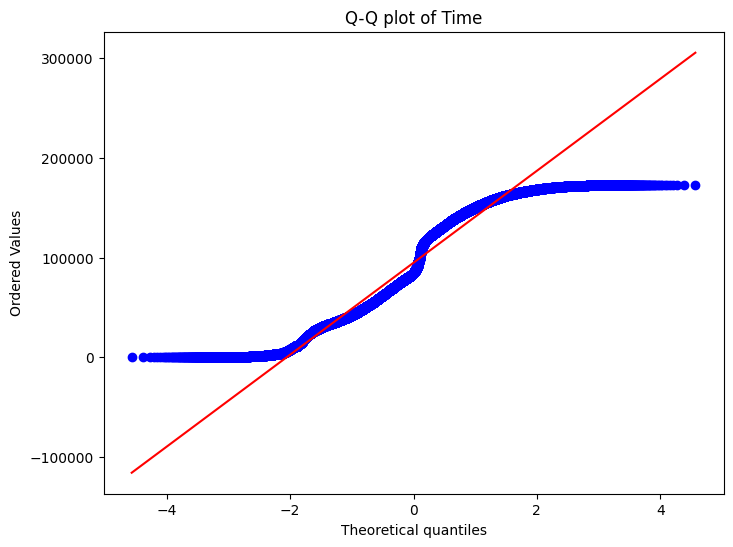

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

time_data = df['Time'].values

# Plot histogram to visualize the distribution
plt.figure(figsize=(10, 6))
sns.histplot(amount_data, bins=30, kde=True, color='blue')

# Fit a normal distribution to the data
mu, sigma = stats.norm.fit(time_data)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mu, sigma)
plt.plot(x, p, 'k', linewidth=2)

# Add labels and title
plt.title("Time Distribution")
plt.xlabel("Time ")
plt.ylabel("Density")

# Show plot
plt.show()

# Plot a Q-Q plot to compare against a theoretical normal distribution
plt.figure(figsize=(8, 6))
stats.probplot(time_data, dist="norm", plot=plt)
plt.title("Q-Q plot of Time")
plt.show()


### Normalization 
*As we can see that both Time and Amount does not have a Gaussian Distribution(Bell Curve) it will be good to perform Normalization on these fields*

Steps:
1. Get X-axis and Y-axis data
2. Train-Test Split
3. Sampling
4. Feature Scaling

#### i) Get X-Axis and Y-Axis data

In [14]:
# Taking columns v1 to v28 plus amount and remocing Class
#x= df.iloc[:,1:29] # Remove .values to view data in tabular structure
x= df.iloc[:,:-1].values
x

array([[ 0.00000000e+00, -1.35980713e+00, -7.27811733e-02, ...,
         1.33558377e-01, -2.10530535e-02,  1.49620000e+02],
       [ 0.00000000e+00,  1.19185711e+00,  2.66150712e-01, ...,
        -8.98309914e-03,  1.47241692e-02,  2.69000000e+00],
       [ 1.00000000e+00, -1.35835406e+00, -1.34016307e+00, ...,
        -5.53527940e-02, -5.97518406e-02,  3.78660000e+02],
       ...,
       [ 1.72788000e+05,  1.91956501e+00, -3.01253846e-01, ...,
         4.45477214e-03, -2.65608286e-02,  6.78800000e+01],
       [ 1.72788000e+05, -2.40440050e-01,  5.30482513e-01, ...,
         1.08820735e-01,  1.04532821e-01,  1.00000000e+01],
       [ 1.72792000e+05, -5.33412522e-01, -1.89733337e-01, ...,
        -2.41530880e-03,  1.36489143e-02,  2.17000000e+02]])

In [15]:
# Considering class as Y attribute
y = df.iloc[:,-1].values
y

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [16]:
''' 
Zero padding is to make the number of features equal to a power of 2.
it is required for 'amplitude encoding' given below.
'''
num_examples, num_features = x.shape
#print(x_train)
print(num_examples)
print(num_features)

print("Log 2 = ", np.log2(num_features))
print("Ceil = ", np.ceil(np.log2(num_features))) 
n = int(np.ceil(np.log2(num_features)))
dim = 2**n
print(f'(number of qubits, dimension of the Hilbert space) = {(n, dim)}')

zeros = np.zeros((num_examples, dim-num_features))
print("Zeroes = ", len(zeros))
X = np.append(x, zeros, axis=1)
print("X = ", X)
num_examples, num_features = X.shape

num_examples, num_features = X.shape   
print("number of examples = ", num_examples)
print("number of features = ", num_features)

283726
30
Log 2 =  4.906890595608519
Ceil =  5.0
(number of qubits, dimension of the Hilbert space) = (5, 32)
Zeroes =  283726
X =  [[ 0.00000000e+00 -1.35980713e+00 -7.27811733e-02 ...  1.49620000e+02
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  1.19185711e+00  2.66150712e-01 ...  2.69000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 1.00000000e+00 -1.35835406e+00 -1.34016307e+00 ...  3.78660000e+02
   0.00000000e+00  0.00000000e+00]
 ...
 [ 1.72788000e+05  1.91956501e+00 -3.01253846e-01 ...  6.78800000e+01
   0.00000000e+00  0.00000000e+00]
 [ 1.72788000e+05 -2.40440050e-01  5.30482513e-01 ...  1.00000000e+01
   0.00000000e+00  0.00000000e+00]
 [ 1.72792000e+05 -5.33412522e-01 -1.89733337e-01 ...  2.17000000e+02
   0.00000000e+00  0.00000000e+00]]
number of examples =  283726
number of features =  32


#### ii) Train-Test Split

In [17]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test =  train_test_split(X,y, test_size = 0.2, random_state=42)

print("X-train", len(x_train))
print("X-test", len(x_test))
print("Y-train", len(y_train))
print("Y-test", len(y_test))

labels = ['Class 0', 'Class 1']

X-train 226980
X-test 56746
Y-train 226980
Y-test 56746


#### iii) Sampling

In [18]:
from imblearn.under_sampling import RandomUnderSampler

# Create the undersampler object
rus = RandomUnderSampler(random_state=1)  # Set a random state for reproducibility

# Fit and apply the undersampling to your data
x_train_resampled, y_train_resampled = rus.fit_resample(x_train, y_train)

x_test_resampled, y_test_resampled = rus.fit_resample(x_test, y_test)

# Print the resampled data
print(len(x_train_resampled))
print(len(y_train_resampled))
print(len(x_test_resampled))
print(len(y_test_resampled))

766
766
180
180


In [19]:
from collections import Counter
Counter(y_train_resampled).items()
# Now, we can see that the data for both Class 0 and Clas 1 are now same. So the data is Balanced.

dict_items([(0, 383), (1, 383)])

#### iv) Feature Scaling

In [20]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train_resampled)
x_test_scaled = scaler.transform(x_test_resampled)

print(len(x_train_scaled))
print(len(x_test_scaled))

766
180


# 4. Applying Quantum Models

### Helper Report Generation Functions

In [21]:
from sklearn.metrics import confusion_matrix, roc_curve, auc
from matplotlib import pyplot as plt

def plot_confusion_matrix(y_true, y_pred, labels):
    """
    Plots a confusion matrix based on true and predicted labels.

    Parameters:
    y_true : array-like of shape (n_samples,)
        True labels.
    y_pred : array-like of shape (n_samples,)
        Predicted labels.
    labels : list of str
        List of class labels.
    """
    # Generate confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    # Visualize confusion matrix using heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()



In [22]:
# The ROC curve plots the True Positive Rate (TPR) on the y-axis against the False Positive Rate (FPR) on the x-axis as the discrimination threshold is varied.
#  - It helps visualize the model's ability to distinguish between fraudulent and legitimate transactions.
#  - A model with a higher AUC (Area Under the Curve) is generally better at discrimination.

def plot_roc_curve(y_true, y_pred):
  """
  Plots the ROC curve for a model.

  Parameters:
    y_true : array-like of shape (n_samples,)
      True labels.
    y_pred : array-like of shape (n_samples,)
      Predicted probabilities.
  """
  fpr, tpr, thresholds = roc_curve(y_true, y_pred)
  roc_auc = auc(fpr, tpr)

  plt.figure(figsize=(8, 6))
  plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
  plt.plot([0, 1], [0, 1], 'k--', label='No Discrimination')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate (FPR)')
  plt.ylabel('True Positive Rate (TPR)')
  plt.title('ROC Curve')
  plt.legend(loc="lower right")
  plt.show()



In [23]:
# The ROC curve plots the True Positive Rate (TPR) on the y-axis against the False Positive Rate (FPR) on the x-axis as the discrimination threshold is varied.
#  - It helps visualize the model's ability to distinguish between fraudulent and legitimate transactions.
#  - A model with a higher AUC (Area Under the Curve) is generally better at discrimination.

def plot_roc_curve(y_true, y_pred):
  """
  Plots the ROC curve for a model.

  Parameters:
    y_true : array-like of shape (n_samples,)
      True labels.
    y_pred : array-like of shape (n_samples,)
      Predicted probabilities.
  """
  fpr, tpr, thresholds = roc_curve(y_true, y_pred)
  roc_auc = auc(fpr, tpr)

  plt.figure(figsize=(8, 6))
  plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
  plt.plot([0, 1], [0, 1], 'k--', label='No Discrimination')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate (FPR)')
  plt.ylabel('True Positive Rate (TPR)')
  plt.title('ROC Curve')
  plt.legend(loc="lower right")
  plt.show()



In [24]:
# Precision-Recall Curve(Use for Imbalanced DataSet):

# - The precision-recall curve plots Precision (positive predictive value) on the y-axis against Recall (true positive rate) on the x-axis as the classification threshold is varied.
# - This is useful when dealing with imbalanced datasets, where positive cases (fraudulent transactions) might be rare.
# - A model with a curve that stays closer to the top-left corner indicates a better balance between precision and recall.
def plot_precision_recall_curve(y_true, y_pred):
  """
  Plots the precision-recall curve for a model.

  Parameters:
    y_true : array-like of shape (n_samples,)
      True labels.
    y_pred : array-like of shape (n_samples,)
      Predicted labels.
  """
  precision, recall, thresholds = precision_recall_curve(y_true, y_pred)

  plt.figure(figsize=(8, 6))
  plt.plot(recall, precision, label='Precision-Recall Curve')
  plt.xlabel('Recall')
  plt.ylabel('Precision')
  plt.title('Precision-Recall Curve')
  plt.legend(loc="lower left")
  plt.show()



In [25]:
# Distribution Plots:

# - Create histograms or kernel density estimation (KDE) plots to visualize the distribution of features or predicted probabilities for both fraudulent and legitimate transactions.
# - This can help identify potential patterns or outliers that might be related to fraudulent activity.

def plot_distribution(data, feature_name, class_label="class_label", kind="kde"):
  """
  Plots the distribution of a feature for different classes.

  Parameters:
    data : pandas DataFrame
      DataFrame containing the data.
    feature_name : str
      Name of the feature to plot.
    class_label : str, optional
      Name of the class label column (default: "class_label").
    kind : str, optional
      Plot kind (e.g., "hist" for histogram, "kde" for kernel density estimation).
  """
  sns.displot(data=data, x=feature_name, hue=class_label, kind=kind)
  plt.title(f'Distribution of {feature_name} by {class_label}')
  plt.show()



In [26]:
def plot_predicted_probability_distribution(y_pred, bins=10):
  """
  Plots the distribution of predicted probabilities.

  Parameters:
    y_pred : array-like
      Array of predicted probabilities.
    bins : int, optional
      Number of bins for the histogram (default: 10).
  """
  sns.displot(y_pred, bins=bins, kde=True)
  plt.title('Distribution of Predicted Probabilities')
  plt.show()

In [27]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def show_result(y_test, y_pred, labels):
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy::  {accuracy:.2f}")
    
    precision = precision_score(y_test, y_pred)
    print(f"Precision Score::  {precision:.2f}")
    
    recall = recall_score(y_test, y_pred)
    print(f"Recall Score::  {recall:.2f}")
    
   # f1score = f1_score(precision, recall)
    #print(f"F1-Score::  {f1score:.2f}")
    
    confusion_matrix(y_test, y_pred)
    plot_confusion_matrix(y_test, y_pred, labels)
    plot_roc_curve(y_test, y_pred)
    plot_predicted_probability_distribution(y_pred)
    
    return {"accuracy" : accuracy, "precision" : precision, "recall" : recall}


## Circuit Creation

In [28]:
from qiskit.circuit.library import ZZFeatureMap

num_examples, num_features = x_train_scaled.shape
#print(x_train)
print(num_features)

feature_map = ZZFeatureMap(feature_dimension=num_features, reps=1)
#print(feature_map)

#feature_map.decompose().draw(output="mpl", style="clifford", fold=20)

#feature_map.decompose().draw(output="text", style="clifford")

32


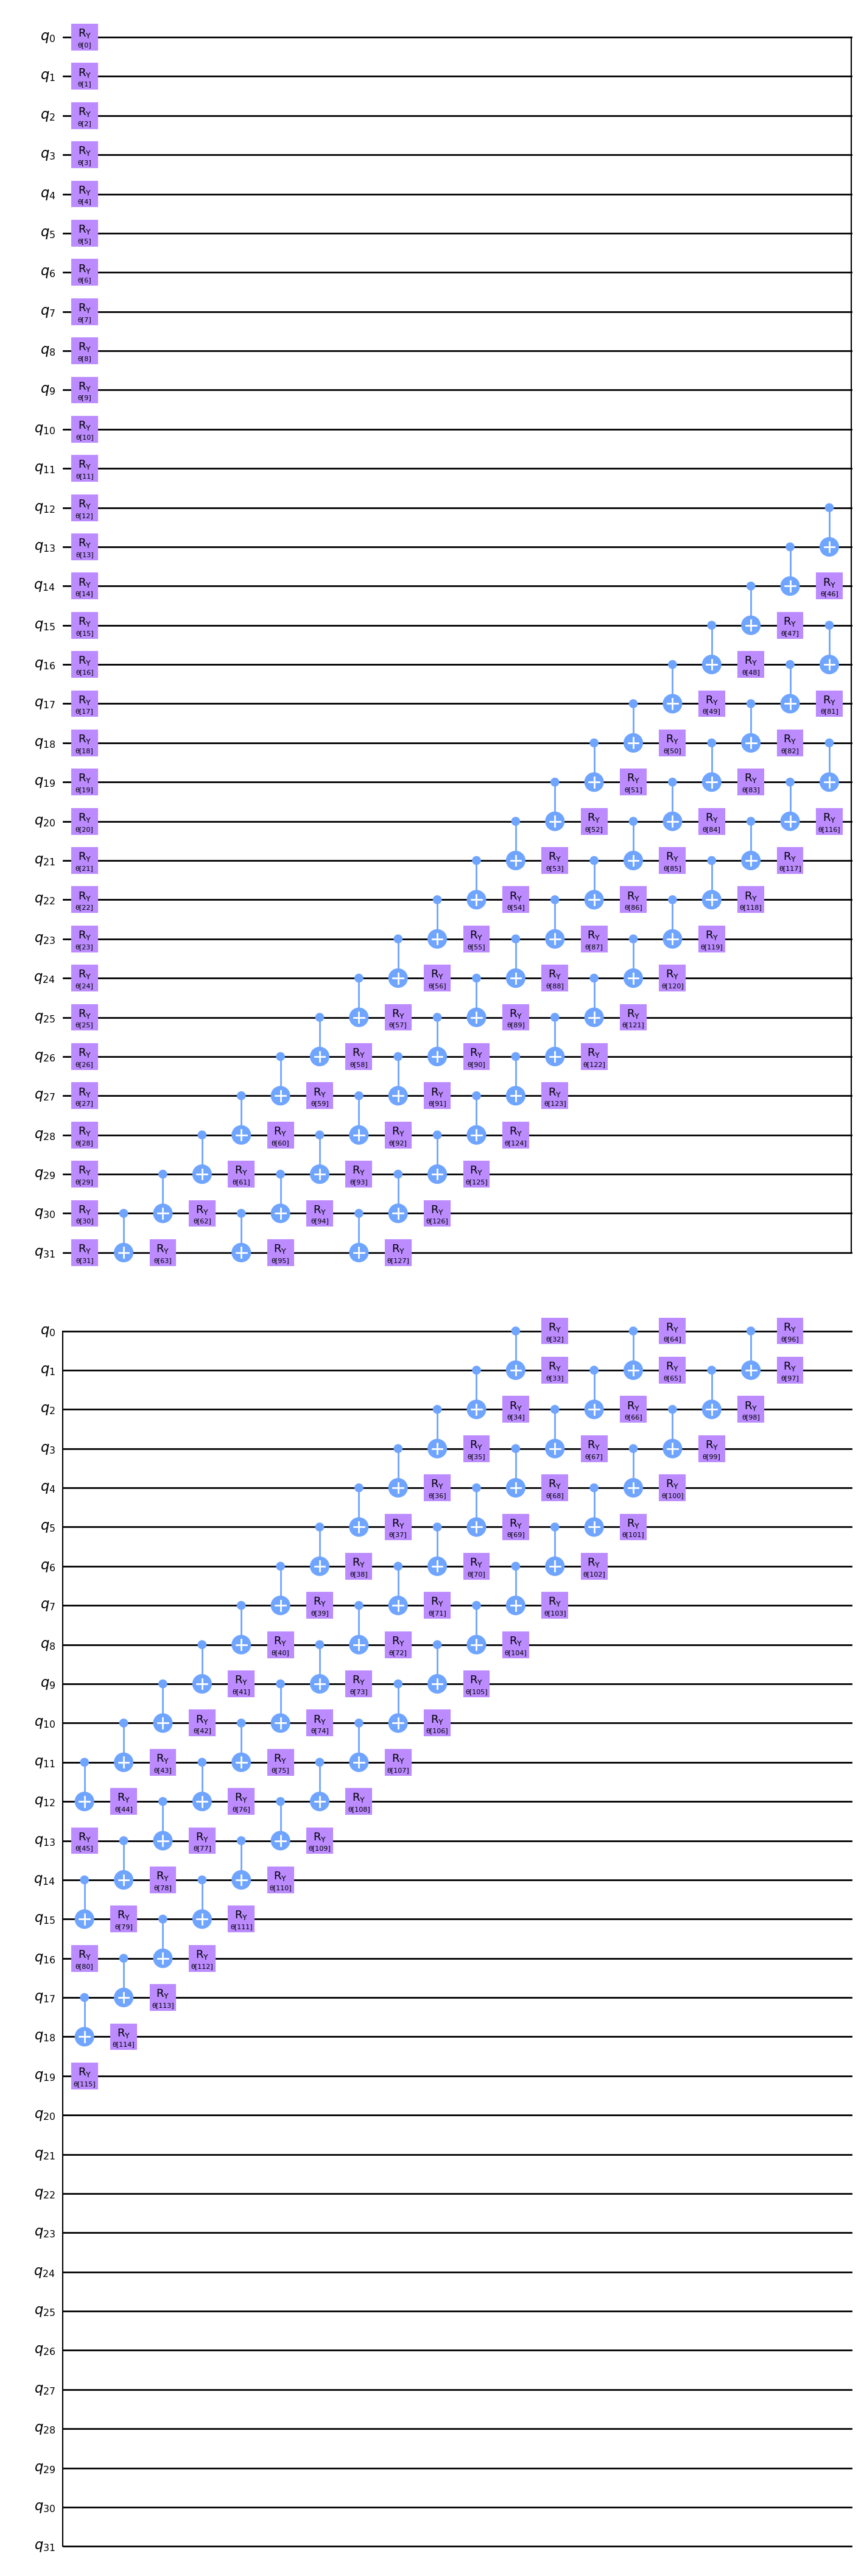

In [29]:
from qiskit.circuit.library import RealAmplitudes

ansatz = RealAmplitudes(num_qubits=num_features, reps=3)
ansatz.decompose().draw(output="mpl", style="clifford", fold=20)

In [30]:
from matplotlib import pyplot as plt
from IPython.display import clear_output

objective_func_vals = []
plt.rcParams["figure.figsize"] = (12, 6)


def callback_graph(weights, obj_func_eval):
    clear_output(wait=True)
    objective_func_vals.append(obj_func_eval)
    plt.title("Objective function value against iteration")
    plt.xlabel("Iteration")
    plt.ylabel("Objective function value")
    plt.plot(range(len(objective_func_vals)), objective_func_vals)
    plt.show()

In [31]:
# Initialize your account
from qiskit_ibm_runtime import QiskitRuntimeService
service = QiskitRuntimeService()
 
service.backends()

ModuleNotFoundError: No module named 'qiskit_ibm_runtime'

In [ ]:
backend = service.backend("ibmq_qasm_simulator")

In [ ]:
from qiskit import QuantumCircuit
from qiskit_aer import Aer

In [ ]:
from qiskit_machine_learning.circuit.library import RawFeatureVector

print("Num features :", num_features)

fm = RawFeatureVector(feature_dimension=num_features) 
fm.draw() 

Num features : 32


»
q_0: »
     »
q_1: »
     »
q_2: »
     »
q_3: »
     »
q_4: »
     »
«     ┌─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┐
«q_0: ┤0                                                                                                                                                                                                                ├
«     │                                                                                                                                                                                                                 │
«q_1: ┤1                                                                                                                                                                                                                ├
«     │                                                                                                                                                                                                                 │
«q_2: ┤2 Parameterizedinitialize(x[0],x[1],x[2],x[3],x[4],x[5],x[6],x[7],x[8],x[9],x[10],x[11],x[12],x[13],x[14],x[15],x[16],x[17],x[18],x[19],x[20],x[21],x[22],x[23],x[24],x[25],x[26],x[27],x[28],x[29],x[30],x[31]) ├
«     │                                                                                                                                                                                                                 │
«q_3: ┤3                                                                                                                                                                                                                ├
«     │                                                                                                                                                                                                                 │
«q_4: ┤4                                                                                                                                                                                                                ├
«     └─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┘

In [ ]:
from qiskit.circuit.library import RealAmplitudes


'''
For angle encoding, num_qubits = num_features
For amplitude encoding, num_qubits = n = np.log2(num_features)
'''

pqc = RealAmplitudes(num_qubits=n, reps=3)
pqc.decompose().draw()

┌──────────┐                                          ┌──────────┐»
q_0: ┤ Ry(θ[0]) ├──────────────────────────────────■───────┤ Ry(θ[5]) ├»
     ├──────────┤                                ┌─┴─┐     ├──────────┤»
q_1: ┤ Ry(θ[1]) ├──────────────────────■─────────┤ X ├─────┤ Ry(θ[6]) ├»
     ├──────────┤                    ┌─┴─┐    ┌──┴───┴───┐ └──────────┘»
q_2: ┤ Ry(θ[2]) ├──────────■─────────┤ X ├────┤ Ry(θ[7]) ├──────■──────»
     ├──────────┤        ┌─┴─┐    ┌──┴───┴───┐└──────────┘    ┌─┴─┐    »
q_3: ┤ Ry(θ[3]) ├──■─────┤ X ├────┤ Ry(θ[8]) ├─────■──────────┤ X ├────»
     ├──────────┤┌─┴─┐┌──┴───┴───┐└──────────┘   ┌─┴─┐    ┌───┴───┴───┐»
q_4: ┤ Ry(θ[4]) ├┤ X ├┤ Ry(θ[9]) ├───────────────┤ X ├────┤ Ry(θ[14]) ├»
     └──────────┘└───┘└──────────┘               └───┘    └───────────┘»
«                               ┌───────────┐                          »
«q_0: ───────────────────■──────┤ Ry(θ[10]) ├───────────────────■──────»
«                      ┌─┴─┐    ├───────────┤                 ┌─┴─┐    »
«q_1: ──────■──────────┤ X ├────┤ Ry(θ[11]) ├──────■──────────┤ X ├────»
«         ┌─┴─┐    ┌───┴───┴───┐└───────────┘    ┌─┴─┐    ┌───┴───┴───┐»
«q_2: ────┤ X ├────┤ Ry(θ[12]) ├──────■──────────┤ X ├────┤ Ry(θ[17]) ├»
«     ┌───┴───┴───┐└───────────┘    ┌─┴─┐    ┌───┴───┴───┐└───────────┘»
«q_3: ┤ Ry(θ[13]) ├──────■──────────┤ X ├────┤ Ry(θ[18]) ├─────────────»
«     └───────────┘    ┌─┴─┐    ┌───┴───┴───┐└───────────┘             »
«q_4: ─────────────────┤ X ├────┤ Ry(θ[19]) ├──────────────────────────»
«                      └───┘    └───────────┘                          »
«     ┌───────────┐
«q_0: ┤ Ry(θ[15]) ├
«     ├───────────┤
«q_1: ┤ Ry(θ[16]) ├
«     └───────────┘
«q_2: ─────────────
«                  
«q_3: ─────────────
«                  
«q_4: ─────────────
«

## Model 1. VQC (Variation Quantum Classifier)

In [ ]:
import time
from qiskit_machine_learning.algorithms.classifiers import VQC
import gc; gc.collect()

from qiskit_algorithms.optimizers import COBYLA
from qiskit.primitives import Sampler

from qiskit import QuantumCircuit
from qiskit_aer import Aer


optimizer = COBYLA(maxiter=150)
sampler = Sampler()

vqc = VQC(
    sampler=sampler,
    feature_map=fm, #feature_map,
    ansatz=pqc, #ansatx
    optimizer=optimizer,
    callback=callback_graph,
   
)

# clear objective value history
objective_func_vals = []



In [ ]:
print(len(x_train_scaled))
print(len(y_train_resampled))

766
766


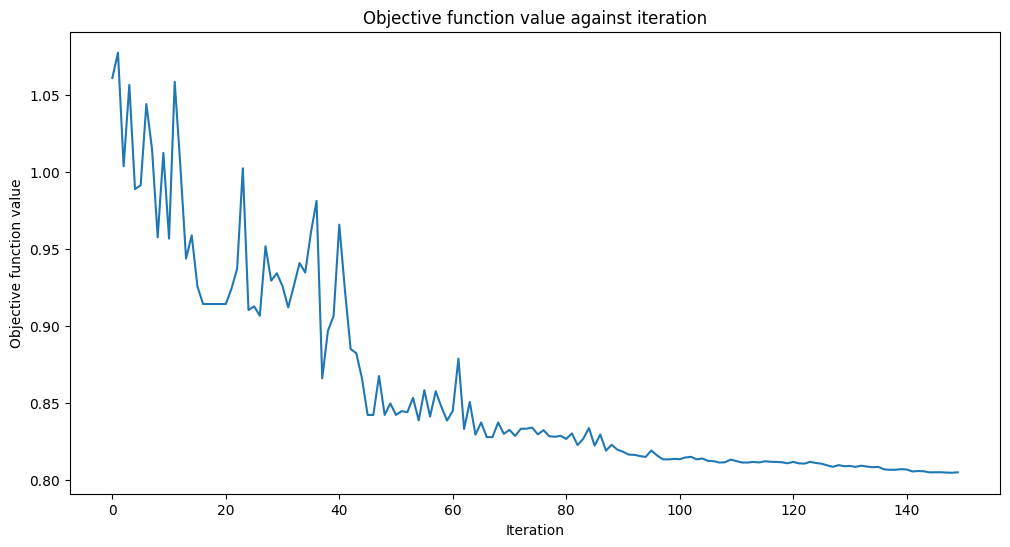

CPU times: total: 2min 19s
Wall time: 7min 49s


In [ ]:
%%time
#start = time.time()
vqc.fit(x_train_scaled, y_train_resampled)
#elapsed = time.time() - start

#print(f"Training time: {round(elapsed)} seconds")

In [ ]:
import gc
gc.collect()

print(x_train)
print(x_test)
y_train_pred = vqc.predict(x_train)

[[ 5.78730000e+04 -1.35389387e+00 -1.08103407e+00 ...  3.18000000e+02
   0.00000000e+00  0.00000000e+00]
 [ 1.62025000e+05 -5.99360554e-02  5.82524567e-01 ...  3.33200000e+01
   0.00000000e+00  0.00000000e+00]
 [ 4.12510000e+04 -3.62164350e-01  7.15165319e-01 ...  1.99900000e+01
   0.00000000e+00  0.00000000e+00]
 ...
 [ 7.99830000e+04  1.25931014e+00 -4.94838549e-02 ...  4.50000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 8.85360000e+04  1.98290281e+00 -1.34426982e-01 ...  3.94800000e+01
   0.00000000e+00  0.00000000e+00]
 [ 7.65580000e+04 -4.65150246e-01  8.18433341e-01 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]]
[[ 6.91950000e+04  1.05437903e+00 -7.64756419e-01 ...  5.64200000e+01
   0.00000000e+00  0.00000000e+00]
 [ 8.07690000e+04 -4.80513394e+00  4.35119136e+00 ...  9.82000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 4.11820000e+04 -1.54983345e+00 -2.61143159e-01 ...  4.60800000e+01
   0.00000000e+00  0.00000000e+00]
 ...
 [ 1.26649000e+05  1.97664559e+00 -3.0767306

In [ ]:
y_test_pred = vqc.predict(x_test)

## Model 2. Neural Network Classifier 

# Analyze and Generate Reports

In [ ]:
%pip install pickleshare

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import pickle
file_name = "sharedfile"
comparison_results = {}
comparison_results.update(pickle.load(open(file_name, "rb")))
#%store -r comparison_results
#%store -r x
print(comparison_results)
#comparison_results = {}
#%store

{'LogisticRegression': {'accuracy': 0.9453672485922578, 'precision': 0.975909510097303, 'recall': 0.9134999911914451}, 'kNN': {'accuracy': 0.9996999170358863, 'precision': 0.9994013768332835, 'recall': 1.0}, 'NaiveBayes': {'accuracy': 0.914291009867434, 'precision': 0.9711041691697705, 'recall': 0.8543417366946778}, 'DecisionTree': {'accuracy': 0.9997440468835501, 'precision': 0.9994893646992534, 'recall': 1.0}, 'RandomForest': {'accuracy': 0.999964696121869, 'precision': 0.9999295365265031, 'recall': 1.0}, 'SVC_Sigmoid': {'accuracy': 0.8736842105263158, 'precision': 0.9032258064516129, 'recall': 0.8484848484848485}, 'SVC_Linear': {'accuracy': 0.9210526315789473, 'precision': 0.9666666666666667, 'recall': 0.8787878787878788}, 'SVC_Poly': {'accuracy': 0.8842105263157894, 'precision': 1.0, 'recall': 0.7777777777777778}, 'SVC_RBF': {'accuracy': 0.9157894736842105, 'precision': 0.9770114942528736, 'recall': 0.8585858585858586}}


### Helper Report Generation Functions

# VQC Reports

In [ ]:
print(classification_report(y_train, y_train_pred))
print(confusion_matrix(y_train, y_train_pred), "= confusion matrix for train set \n")

print(classification_report(y_test, y_test_pred))
print(confusion_matrix(y_test, y_test_pred), "= confusion matrix for test set \n ")
print(round(roc_auc_score(y_test, y_test_pred),2), "= roc_auc_score for test set \n")

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    226597
           1       0.01      0.00      0.00       383

    accuracy                           1.00    226980
   macro avg       0.50      0.50      0.50    226980
weighted avg       1.00      1.00      1.00    226980

[[226401    196]
 [   382      1]] = confusion matrix for train set 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56656
           1       0.00      0.00      0.00        90

    accuracy                           1.00     56746
   macro avg       0.50      0.50      0.50     56746
weighted avg       1.00      1.00      1.00     56746

[[56613    43]
 [   90     0]] = confusion matrix for test set 
 
0.5 = roc_auc_score for test set 



Accuracy::  1.00
Precision Score::  0.00
Recall Score::  0.00


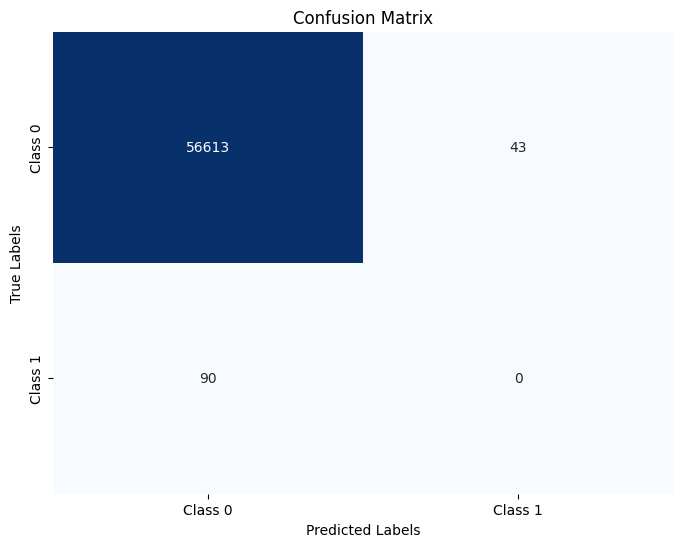

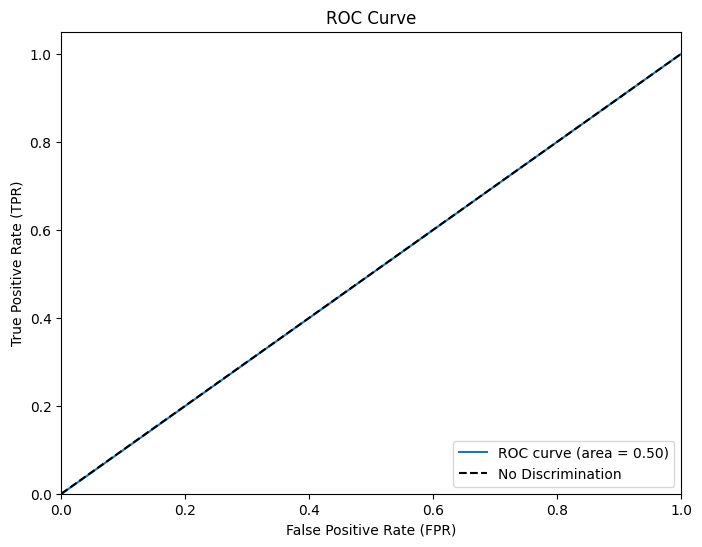

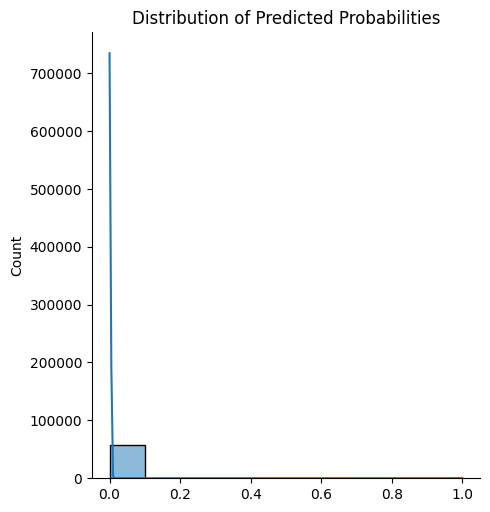

In [ ]:
comparison_results["VQC"] =show_result(y_test, y_test_pred, labels)

# Conclusion

                    accuracy  precision    recall
LogisticRegression  0.945367   0.975910  0.913500
kNN                 0.999700   0.999401  1.000000
NaiveBayes          0.914291   0.971104  0.854342
DecisionTree        0.999744   0.999489  1.000000
RandomForest        0.999965   0.999930  1.000000
SVC_Sigmoid         0.873684   0.903226  0.848485
SVC_Linear          0.921053   0.966667  0.878788
SVC_Poly            0.884211   1.000000  0.777778
SVC_RBF             0.915789   0.977011  0.858586
VQC                 0.997656   0.000000  0.000000


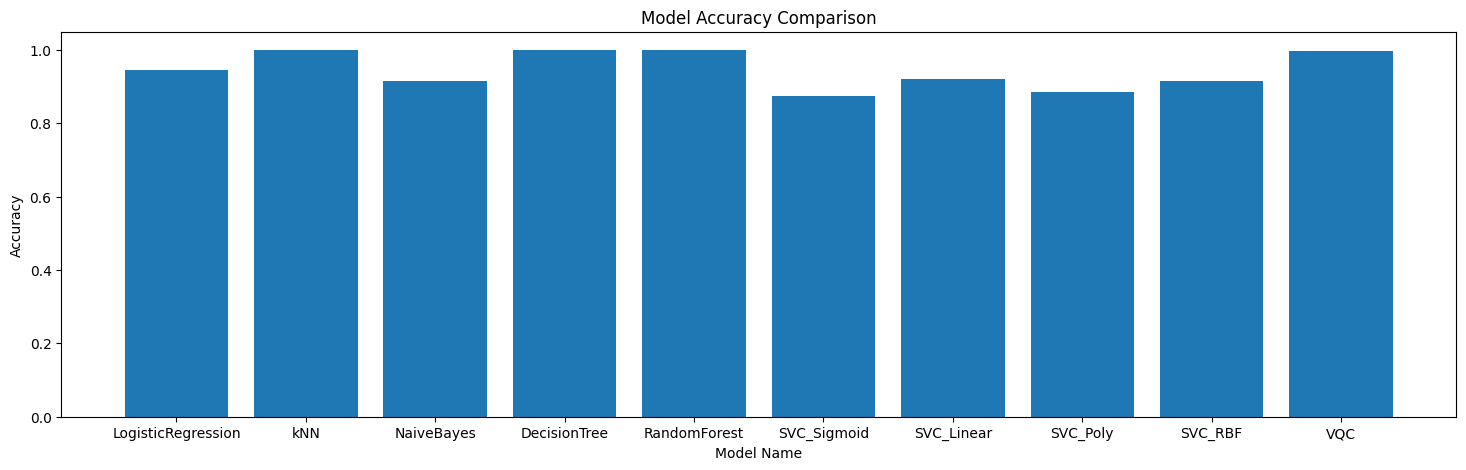

In [ ]:
# Convert the dictionary to a Pandas DataFrame
df = pd.DataFrame(comparison_results).transpose()  # Transpose for better table view

# Print the table
print(df)

# Create a bar chart for accuracy
plt.figure(figsize=(18, 5))
plt.bar(df.index, df["accuracy"])
plt.xlabel("Model Name")
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.show()